In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
file_path = 'diabetes.csv'
data = pd.read_csv(file_path)

In [ ]:
# Display basic information about the dataset
print("Initial Dataset Info:")
print(data.info())

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [ ]:
# Check for missing values
print("\nMissing Values in Dataset:")
print(data.isnull().sum())


Missing Values in Dataset:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# Drop duplicates if any
data_cleaned = data.drop_duplicates()

In [ ]:
# Identify columns that may need transformation (e.g., scaling or encoding categorical data)
print("\nColumns in Dataset:")
print(data_cleaned.columns)


Columns in Dataset:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
# Display first few rows to inspect the data
print("\nSample of the Dataset:")
print(data_cleaned.head())


Sample of the Dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
# Basic statistical summary of the data
print("\nStatistical Summary:")
print(data_cleaned.describe())


Statistical Summary:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.00

In [ ]:
# Handle transformations: for numeric columns, we might normalize or standardize
from sklearn.preprocessing import StandardScaler

In [ ]:
# Apply scaling to numerical columns if necessary
# First, let's assume that all numeric columns should be scaled (we will identify them based on dtype)
numeric_cols = data_cleaned.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()

In [ ]:
data_cleaned[numeric_cols] = scaler.fit_transform(data_cleaned[numeric_cols])

In [ ]:
# Show transformed data (first few rows)
print("\nTransformed Dataset:")
print(data_cleaned.head())


Transformed Dataset:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age   Outcome  
0                  0.468492  1.425995  1.365896  
1                 -0.365061 -0.190672 -0.732120  
2                  0.604397 -0.105584  1.365896  
3                 -0.920763 -1.041549 -0.732120  
4                  5.484909 -0.020496  1.365896  


In [ ]:
# Save the cleaned and transformed dataset to a new CSV
cleaned_file_path = 'diabetes_cleaned.csv'
data_cleaned.to_csv(cleaned_file_path, index=False)

In [ ]:
print(f"\nCleaned and transformed data saved to {cleaned_file_path}")


Cleaned and transformed data saved to diabetes_cleaned.csv


In [ ]:
# Set the aesthetics for seaborn
sns.set(style="whitegrid")

In [ ]:
# 1. Histograms for each numeric feature to show distributions
def plot_histograms(data):
    data.hist(figsize=(12, 10), bins=20, edgecolor='black')
    plt.suptitle("Histograms of All Features", fontsize=16)
    plt.show()

In [ ]:
# 2. Correlation Heatmap
def plot_correlation_heatmap(data):
    plt.figure(figsize=(10, 8))
    corr_matrix = data.corr()
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
    plt.title("Correlation Heatmap", fontsize=16)
    plt.show()

In [ ]:
# 3. Boxplots to visualize outliers
def plot_boxplots(data):
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=data, orient='h', palette="Set2")
    plt.title("Boxplots of All Features", fontsize=16)
    plt.show()

In [ ]:
# 4. Pair plot to show feature relationships
def plot_pairplot(data):
    sns.pairplot(data, hue="Outcome", diag_kind="kde", palette="husl", corner=True)
    plt.suptitle("Pair Plot of Features", fontsize=16)
    plt.show()

In [ ]:
# 5. Bar plot for Outcome distribution
def plot_outcome_distribution(data):
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Outcome', data=data, palette="coolwarm")
    plt.title("Distribution of Outcome Variable", fontsize=16)
    plt.show()

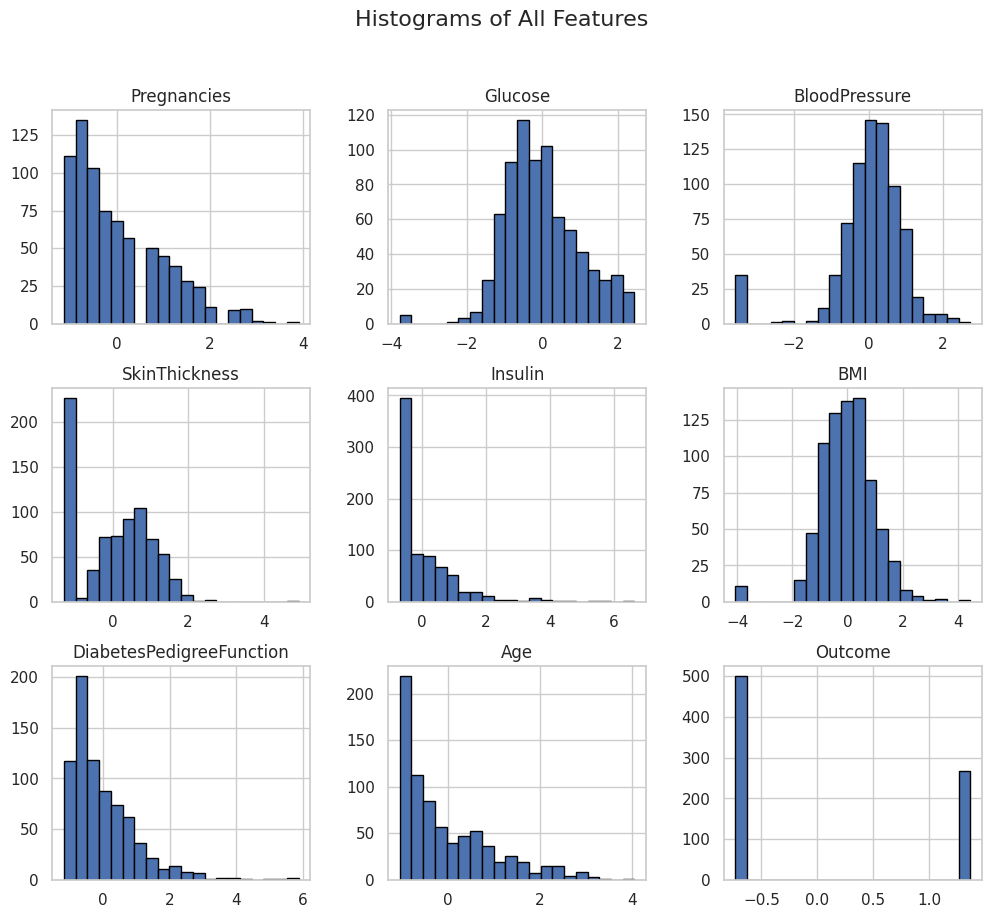

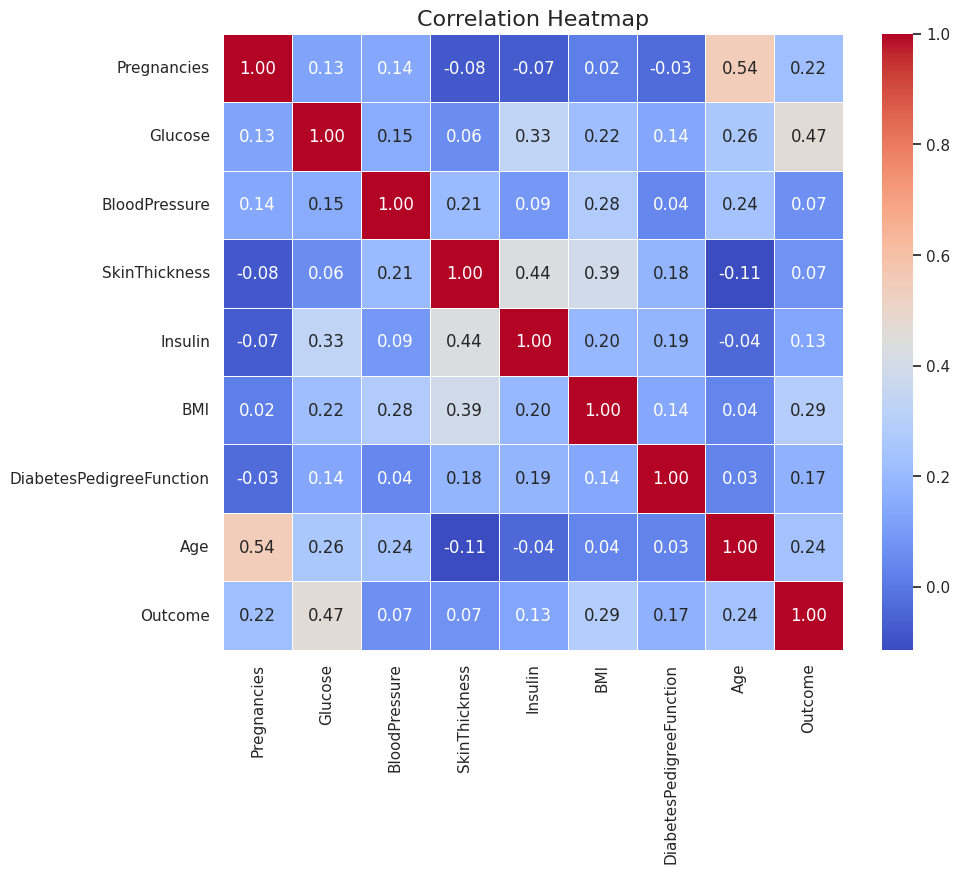

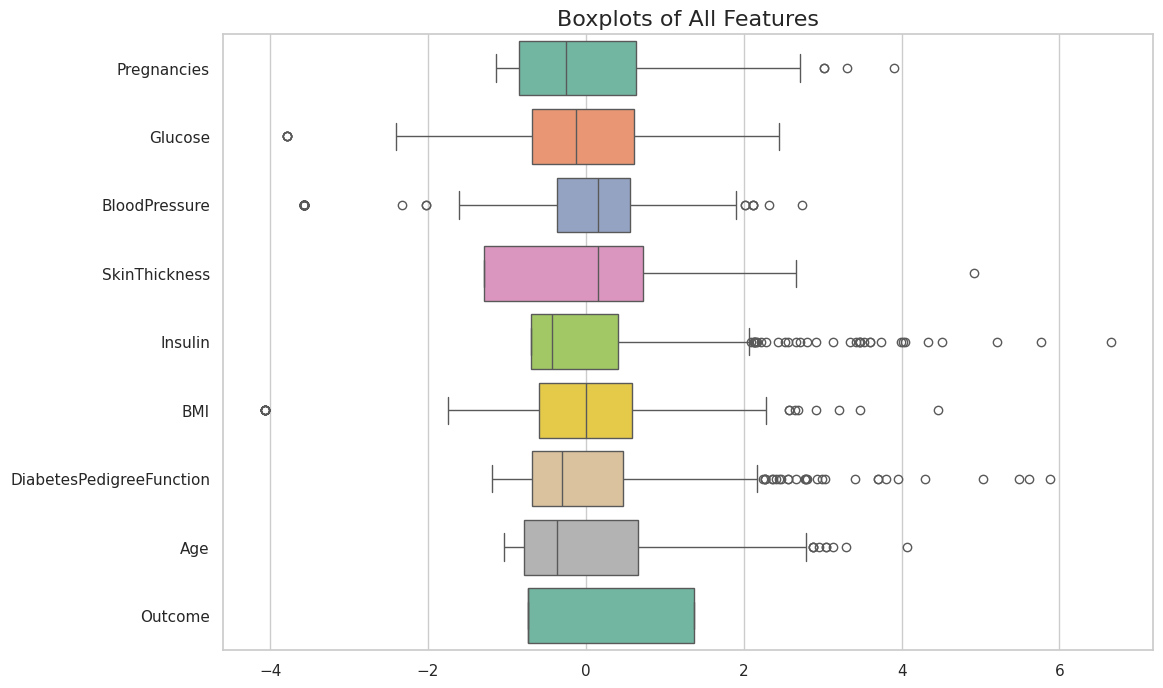

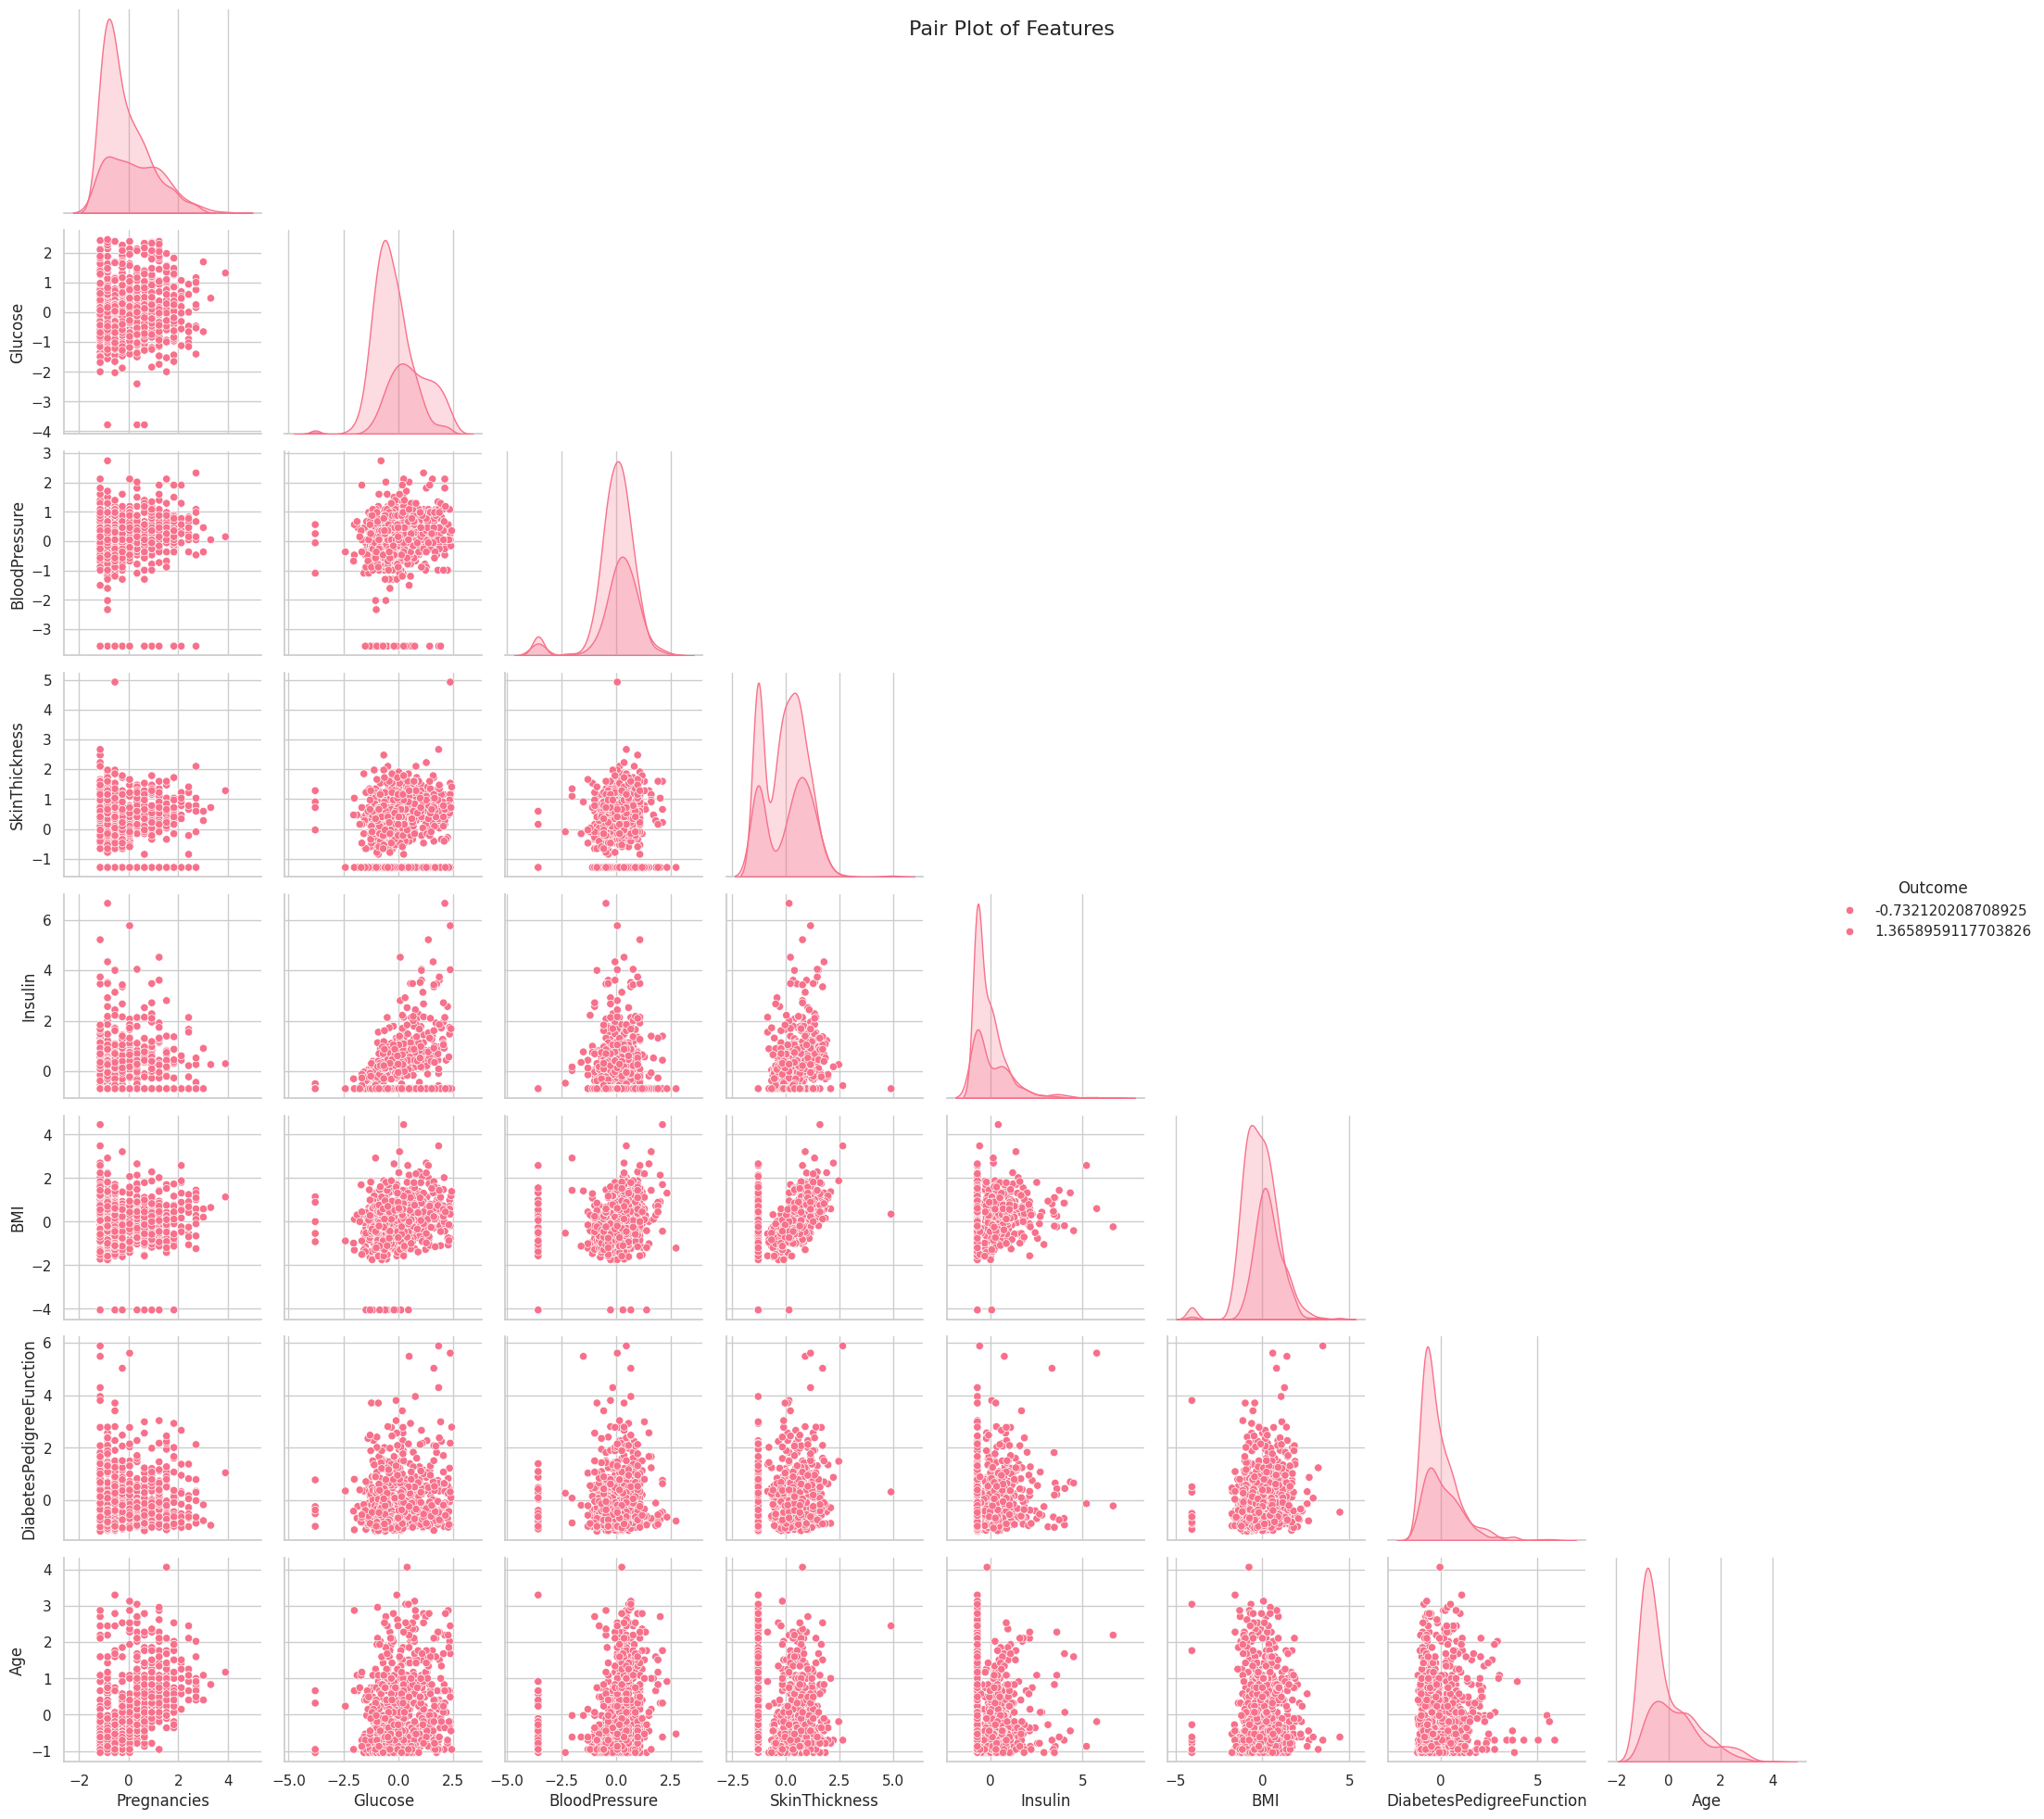

<ipython-input-45-15bc87106b37>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=data, palette="coolwarm")


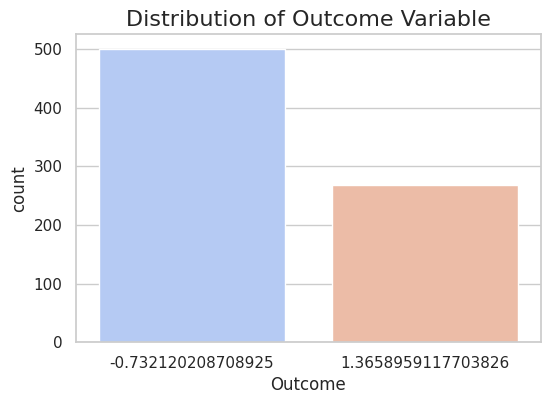

In [ ]:
# Example: Run the visualizations on cleaned and transformed data
plot_histograms(data_cleaned)
plot_correlation_heatmap(data_cleaned)
plot_boxplots(data_cleaned)
plot_pairplot(data_cleaned)
plot_outcome_distribution(data_cleaned)